# King County House Prices Predictions

## Background
In the world of real estate, homeowners often find themselves in a difficult dilemma: trying to understand the intricate web of factors that influence the price of their most cherished possession—their homes. In the world of real estate, homeowners often struggle to understand what makes their homes valuable. Imagine you're a homeowner. Your home is one of your most precious assets. But have you ever wondered why some homes are more expensive than others? It's a bit like a puzzle. Our project is all about solving this puzzle. We are embarking on a journey to empower homeowners with a deep understanding of the determinants of house prices through our project. This project is a collaborative effort with our stakeholder, a prominent real estate agency dedicated to guiding homeowners through the intricate process of buying and selling homes.

## Business Understanding
In the dynamic real estate market of King County, Washington, numerous households aspire to purchase homes. However, the ever-present information asymmetry often leaves these potential buyers navigating the market blindly. To address this prevalent challenge, our project undertakes an in-depth analysis of house sales data spanning the years 2014 to 2015 within King County. Our mission is to offer invaluable consultation services to a reputable real estate agency dedicated to assisting households in their pursuit of homeownership.

Through a comprehensive examination of this dataset, we aim to bridge the information gap in the real estate market. Our objective is to provide a robust method for predicting house prices, enabling prospective buyers to make well-informed decisions about their property investments. In doing so, we empower both homebuyers and the real estate agency with the knowledge and insights needed to navigate the competitive King County housing landscape effectively.

### Challenges
- For homeowners, the challenge is understanding why their homes are worth a certain amount. This knowledge can help them decide if they should sell, renovate, or just enjoy their home as it is.
- The real estate agency faces a challenge too, which is to give homeowners the best advice. To do that, they need to know what makes a home valuable and to provide precise advice, they need to understand what drives property prices.

### Solutions
- Our project's solution is rooted in the power of data analysis. We will embark on a comprehensive exploration of house prices and their underlying determinants. Our aim is to not only identify the fundamental factors that sway home prices but to quantify their influence. In doing so, we seek to provide homeowners with invaluable insights.
- By uncovering the complexities of the property pricing landscape, we aim to enhance the services offered by the real estate agency. Our project is designed to be a beacon of clarity amid the maze of the real estate market.

### Conclusion
This project reflects our collective pursuit to empower homeowners with data-driven insights into their property's value and to unravel the intricate and compelling aspects of house pricing. It is our commitment to provide homeowners, buyers, and our partner agency with a crystal-clear perspective on the determinants of property value, culminating in a predictive model of unwavering accuracy.

### Problem Statement
Our main goal is to understand the various factors that make a house expensive or affordable and to we also want to create a computer model that can guess a house's price based on different factors.

### Objectives
Our general objective is to investigate the effect of independent variables on the price of a house.

The Specific Objectives are to:
1.  Ascertain how the grade  of a house influences its pricing, shedding light on the significance of property grade in valuation.
2.	Examine the relationship between the number of bathrooms in a house and its pricing, contributing to the understanding of how functionality affects price.
3.	Delve into the connection between the square footage of a house and its price, illuminating the role of size in property value.
4.	Construct a robust multi-linear regression model that can predict the price of houses, synthesizing the intricate interplay of determinants.


## Data Understanding

In this section, the identifcation, collection, and surface-level analysis of the data shall be done by:
- Collecting initial data (Has been compiled into a csv file).
- Describing the data we are working with.
- Exploring the data for any relationships and trends.
- Verifying the data quality.

In [10]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from scipy import stats

%matplotlib inline

In [11]:
raw_df = pd.read_csv('data/kc_house_data.csv')
raw_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


By running the `.info()` method, we can get a closer look at the data in the columns, including the data types and number of null values.

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We will further run the `.describe()` method to generate descriptive statistics of the columns.

In [13]:
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


To better understand the dataframe, we will establish its shape as well.

In [14]:
raw_df.shape

(21597, 21)

However, when finding out more information about the dataframe, it was noted that not all columns have the same non-null values. Thus, we will establish exactly how many null values are in each column.

In [15]:
raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We will also take the time to establish whether there are any duplicate values in the dataframe. As there are multiple columns with numerical data, duplicates in those columns can be expected. However, when looking at unique columns e.g. the id, duplicates should not be found.

In [16]:
raw_df[raw_df['id'].duplicated(keep=False)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,NO,NONE,...,7 Average,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,NO,NONE,...,7 Average,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,...,7 Average,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,NO,NONE,...,7 Average,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


## Data Preparation

The preparation of the final dataset is done by:
- Removal of erroneous data.
- Removal of duplicate data, and 
- Removal of null data.


The process is initiated by dropping certain columns that are deemed unnecessary. These columns are: `date, view, lat, long, sqft_living15` and `sqft_loft15`. This is not to say that other columns may not be dropped later, but this step simply eliminates all columns that are deemed surplus to requirements.

In [17]:
df_cleaned = raw_df.drop(['date', 'view', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',"yr_built","yr_renovated"],axis=1)
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0


We will proceed to drop the duplicate values that were found in the data understanding section, keeping the first value of the duplicate. It is assumed that duplicate IDs are erroneous.

In [18]:
df_cleaned.drop_duplicates(subset='id',inplace=True,keep='first')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     19067 non-null  object 
 8   condition      21420 non-null  object 
 9   grade          21420 non-null  object 
 10  sqft_above     21420 non-null  int64  
 11  sqft_basement  21420 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


Ensuring that there are no duplicates

In [19]:
df_cleaned.duplicated().sum()

0

When delving deeper into the results of `df_cleaned.info()`, it is noted that there are columns that contain null values. Thus, any record with a null value in any column shall be dropped.

In [20]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19067 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19067 non-null  int64  
 1   price          19067 non-null  float64
 2   bedrooms       19067 non-null  int64  
 3   bathrooms      19067 non-null  float64
 4   sqft_living    19067 non-null  int64  
 5   sqft_lot       19067 non-null  int64  
 6   floors         19067 non-null  float64
 7   waterfront     19067 non-null  object 
 8   condition      19067 non-null  object 
 9   grade          19067 non-null  object 
 10  sqft_above     19067 non-null  int64  
 11  sqft_basement  19067 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.9+ MB


Now that the dataframe does not contain any null values, it needs to undergo a bit of formatting.

Starting with the data in the `condition` column. The values in this column are all strings, but through mapping, we will convert these values to equivalent numerical values. The conversion is outlined in the table below:

| Old String Value | New Numerical Value |
| ---------------- | ------------------- |
| Poor             | 1                   |
| Fair             | 2                   |
| Average          | 3                   |
| Good             | 4                   |
| Very Good        | 5                   |

The same ideology will be applied in the `waterfront` column. As this column has 2 values, either *YES* or *NO*, they will be converted following the table below:

| Old String Value | New Numerical Value |
| ---------------- | ------------------- |
| NO               | 0                   |
| YES              | 1                   |

In [21]:
df_cleaned.loc[:,'condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})

df_cleaned.loc[:,'waterfront'] = df_cleaned['waterfront'].map({'NO':0,'YES':1})

df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7 Average,2170,400.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6 Low Average,770,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7 Average,1050,910.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8 Good,1680,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,3,11 Excellent,3890,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,3,8 Good,1180,130.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8 Good,1530,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8 Good,2310,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7 Average,1020,0.0


Furthermore, when looking at the `grade` column, the rating as well as a string description is given in the column. Both these values are unnecessary as they are duplicates, thus only the numerical rating will be kept.

In [22]:
df_cleaned.loc[:,'grade'] = df_cleaned['grade'].str.split(' ').str[0]
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,3,11,3890,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,3,8,1180,130.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0.0


However, when looking closely at the `sqft_basement` column, we notice that it has a placeholder value (?), and there are `335` of these question marks. 

In [23]:
df_cleaned['sqft_basement'][df_cleaned['sqft_basement'] == '?'].count()

415

We shall simply drop any records with the placeholder question mark, as we do not know what it could signify and replacing the value may distort the data.

In [24]:
df_cleaned = df_cleaned[df_cleaned['sqft_basement'] != '?']
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,3,11,3890,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,3,8,1180,130.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0.0


Counter checking whether the placeholder values are still present:

In [25]:
df_cleaned['sqft_basement'][df_cleaned['sqft_basement'] == '?'].count()

0

Lastly, we shall ensure that the newly converted columns have appropriate data types. We will first make a copy of `df_cleaned` to ensure there are no warnings, then change the data types on the copy we have made, aptly named `df`.

In [26]:
df = df_cleaned.copy()

df['grade'] = df_cleaned['grade'].astype(np.int64)
df['waterfront'] = df_cleaned['waterfront'].astype(np.int64)
df['condition'] = df_cleaned['condition'].astype(np.int64)
df['sqft_basement'] = df_cleaned['sqft_basement'].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18652 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18652 non-null  int64  
 1   price          18652 non-null  float64
 2   bedrooms       18652 non-null  int64  
 3   bathrooms      18652 non-null  float64
 4   sqft_living    18652 non-null  int64  
 5   sqft_lot       18652 non-null  int64  
 6   floors         18652 non-null  float64
 7   waterfront     18652 non-null  int64  
 8   condition      18652 non-null  int64  
 9   grade          18652 non-null  int64  
 10  sqft_above     18652 non-null  int64  
 11  sqft_basement  18652 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.8 MB


## Exploratory Data Analysis
Here we analyze how different columns relate to each other, check the patterns in the data and examine their correlations to the target variable in this case the `price`

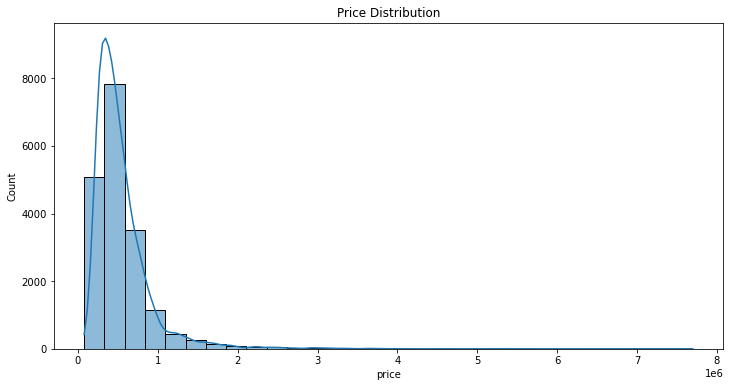

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

This is a  positively skewed distribution is also known as a right-skewed distribution. It suggests that the majority of the prices are concentrated on the lower end, with a few extremely high prices that push the mean (average) higher and, to some extent, the median lower.

Given the columns the best way to explore the data and the check the relationships between the columns and price is by use of a scatter plot

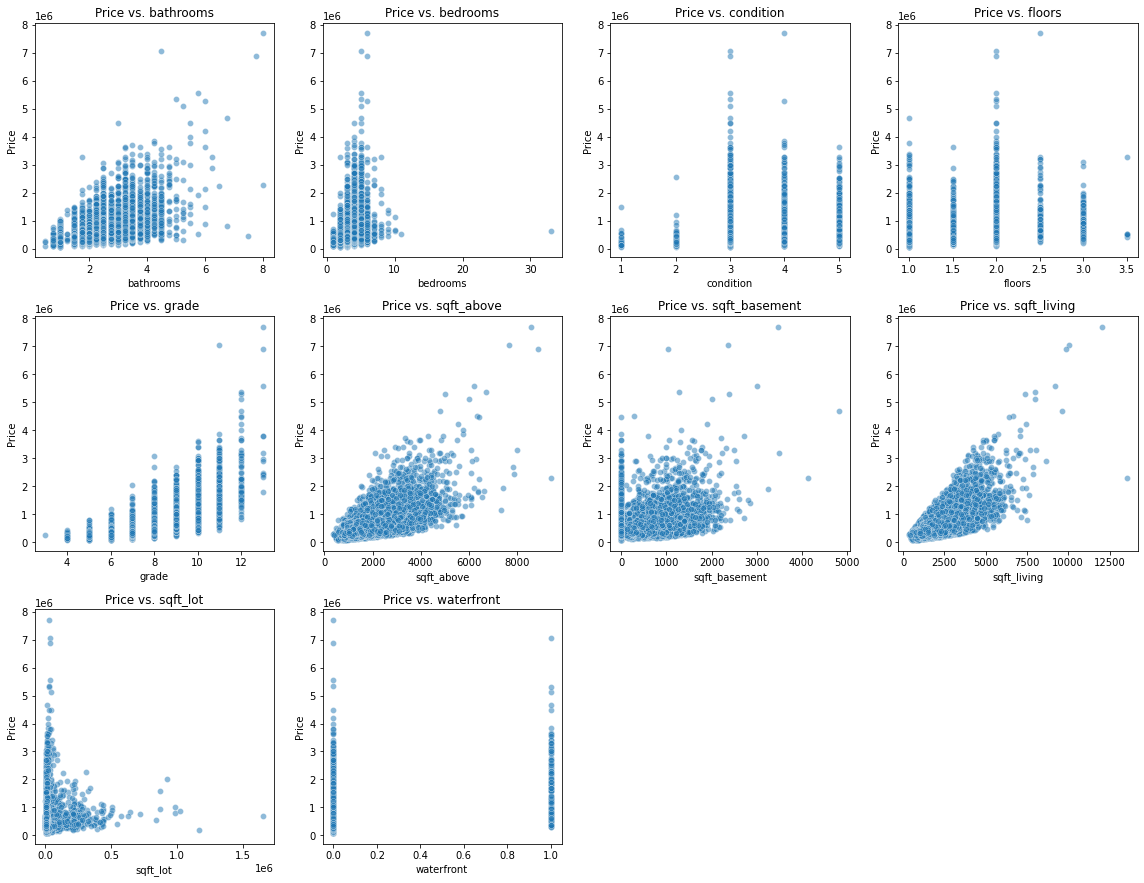

In [28]:
# Select all columns except "id" and "price"
columns = df.columns.difference(["id", "price"])

# Create scatter plots for each selected column
plt.figure(figsize=(16, 16))  # Set the figure size

# Loop through the selected columns and create scatter plots
for i, column in enumerate(columns):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df, x=column, y="price", alpha=0.5)
    plt.title(f"Price vs. {column}")
    plt.xlabel(column)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


From the scatter plots above we can clearly see that variables such as `bedrooms`,`floors`,`grade`,`waterfront`,`condition` and `bathrooms` are discrete variables  whereas the rest of the variables are continous variables. 

The scatter plot shows a positive linear relationship almost all the column variables i.e sqft_above,sqft_basement,sqft_living and bathrooms.

### How does the grade of a house influence its pricing ?

The "grade" of a house represents the quality of materials and the level of craftsmanship used in its construction. Grades are assigned on a scale from 1 to 13, where grade 1 to 3 indicates that a house falls below the minimum building standards and is often characterized by basic or inferior construction. 

On the other end of the scale, grade 13 signifies a custom-designed and meticulously built mansion-level property. These high-grade houses feature a substantial amount of the finest quality craftsmanship, including premium cabinet work, intricate wood trim, elegant marble finishes, grand entryways, and other luxurious features.

To better understand the impact of a house's grade on its pricing, we utilize Exploratory Data Analysis (EDA). We employ box plots to visualize how different grade categories influence house prices. This allows us to assess the significance of property grade in property valuation, shedding light on the relationship between the quality of workmanship and the pricing of homes.

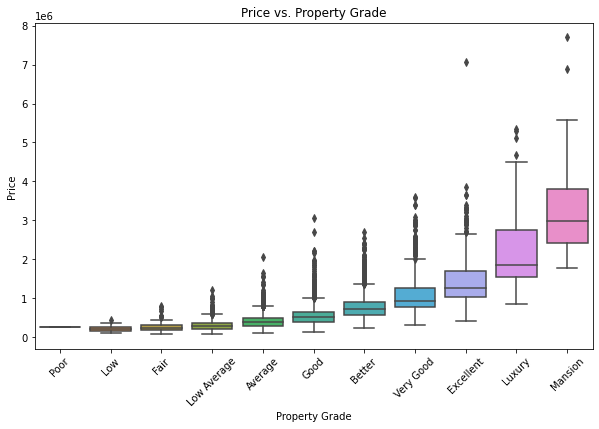

In [29]:
# Create a mapping of grade values to custom labels
grade_labels = {
    3: "Poor",
    4: "Low",
    5: "Fair",
    6: "Low Average",
    7: "Average",
    8: "Good",
    9: "Better",
    10: "Very Good",
    11: "Excellent",
    12: "Luxury",
    13: "Mansion"
}

# Create a list of the custom labels in ascending order
grade_order = sorted(grade_labels.values(), key=lambda x: list(grade_labels.values()).index(x))

# Use the map function to replace numeric values with words
df['grade_words'] = df['grade'].map(grade_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade_words', y='price', data=df, order=grade_order)
plt.title('Price vs. Property Grade')
plt.xlabel('Property Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Interpreting the Data:**

- **Grade Influence:** The box plot allows you to compare the distribution of house prices for each "grade." A higher "grade" generally indicates a higher level of quality and construction. As you move to higher "grade" categories, you can observe the following:

  - **Median Price:** The median price tends to increase, indicating that houses with higher grades are typically associated with higher median prices.

  - **Price Variability:** The length of the boxes (IQR) represents the variability in prices within each "grade" category. Longer boxes suggest greater variability.In grades such as luxury and mansion there is higher price variability as compare to the lower grades.

  - **Outliers:** The presence of outliers beyond the whiskers indicates extreme values. Outliers may represent exceptional houses with unusually high or low prices within a specific "grade." From the data the ouliers are few and only exist in the higher graded houses

- **Grade Impact:** The box plot demonstrates the impact of the "grade" variable on house prices, showing how prices tend to vary as you move from lower to higher grades.The prices increases with the increase in grades.

<!-- - **Decision Making:** This information can be valuable for both buyers and sellers. Buyers can use it to understand the price distribution within a particular "grade" and make informed decisions. Sellers can use it to set appropriate listing prices based on the grade of their property.

- **Market Insights:** The box plot provides insights into how the housing market values different grades, helping real estate professionals and homeowners better understand pricing dynamics. -->





### Does the number of bathrooms in a house influence its pricing ?
Examine the relationship between the number of bathrooms in a house and its pricing, contributing to the understanding of how functionality affects price.

Here we use a barplot to visualize the relationship between the house price and number of bathrooms since the bathroom data is discrete and limited in number thus making a barplot better than a scatter plot

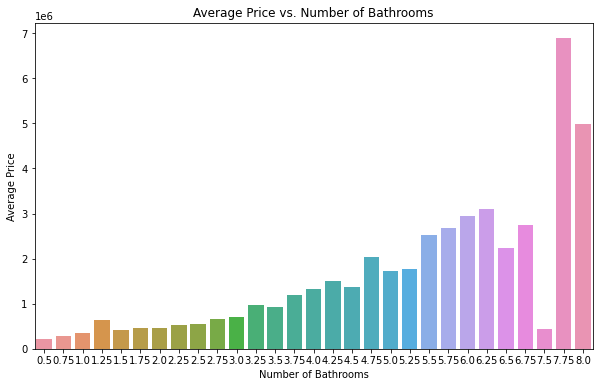

In [30]:
# Create a bar plot to show the average price for each number of bathrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bathrooms', y='price', data=df, ci=None)
plt.title('Average Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()

The plot allows you to observe how the average price varies with the number of bathrooms. You can identify trends and patterns in the data. For example, you can see if there is a noticeable increase  in the average price as the number of bathrooms increases.

It appears that the average price for houses with 2.50 bathrooms is higher than for houses with 1.00 bathroom, and it continues to change as you move to houses with more bathrooms.

In some real estate listings or in this particular case, "2.5 bathrooms"  refers to a house with two full bathrooms and one half bathroom (e.g., a bathroom with only a toilet and sink but no shower or bathtub). It's a common way to describe the bathroom configuration in real estate.

### How does price relate with other variables ?

To show the relationship between house price and the independent variables we use pearson correlation coefficient.

In [31]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.705109
grade            0.667324
sqft_above       0.608980
bathrooms        0.527260
sqft_basement    0.324792
bedrooms         0.310195
waterfront       0.278679
floors           0.257623
sqft_lot         0.086273
condition        0.036267
id              -0.017864
Name: price, dtype: float64

We can be able to understand the corelation above by use of a corelation heatmap as shown below

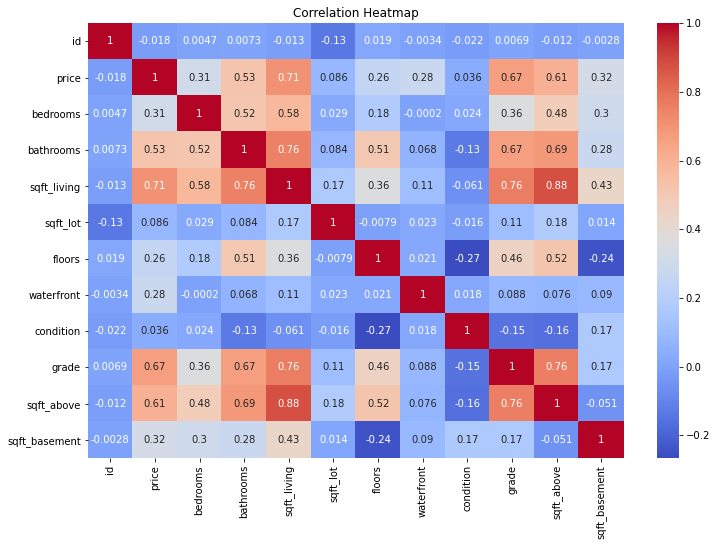

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The output and the heatmap shown above represents the Pearson correlation coefficients between the "price" variable and all other variables in your dataset.

- `sqft_living`: This variable has a strong positive correlation (0.706620) with "price." It means that as the square footage of the living area increases, the price of the house tends to increase as well.

- `grade`: "grade" also has a strong positive correlation (0.663941) with "price." A higher grade typically corresponds to a higher price.

- `sqft_above`: The square footage of the house above ground level has a positive correlation (0.611697) with "price." As this area increases, the price tends to increase.

- `bathrooms`: The number of bathrooms has a moderate positive correlation (0.526989) with "price." More bathrooms are associated with higher prices.

- `sqft_basement`: The square footage of the basement has a positive correlation (0.322075) with "price." A larger basement tends to be associated with higher house prices.

- `bedrooms`: The number of bedrooms has a positive correlation (0.306903) with "price." More bedrooms often lead to higher prices.

- `waterfront`: A house having a waterfront view has a positive correlation (0.282924) with "price." Waterfront properties are typically more expensive.

- `floors`: The number of floors in a house has a positive correlation (0.258943) with "price." Houses with more floors tend to have higher prices.

- `sqft_lot`: The size of the lot has a positive correlation (0.083099) with "price." Larger lots may be associated with higher house prices.

- `condition`: The condition of the house has a very weak positive correlation (0.032369) with "price." It suggests that the condition may have a limited impact on house prices in this dataset.

